In [ ]:

!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.12 MiB | 27.05 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.


In [ ]:
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.2/915.2 kB 52.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

In [ ]:
from glob import glob
from bs4 import BeautifulSoup
import os

In [ ]:
labels_dir = list(sorted(glob("/content/drive/MyDrive/AI_Visual/Data/Detect_dog_cat_b1/annotations*.xml")))

In [ ]:
# Create dataset->export->labels foler and a list of txt lables.
text_labels_dir = '/content/export/labels'
os.makedirs(text_labels_dir, exist_ok = True)

In [ ]:
# Change labels from xml to txt.
for labels in labels_dir :
    with open(labels, 'r') as f :
        data = f.read()
        soup = BeautifulSoup(data, 'xml')

        img_size = soup.find('size')
        img_width = int(img_size.find('width').text)
        img_height = int(img_size.find('height').text)

        objects = soup.find_all('object')
        obj_list = []
        class_lambda = lambda x : 0 if x == 'cat' else 1
        for obj in objects :
            label = class_lambda(obj.find('name').text)
            xmin = int(obj.find('xmin').text)
            ymin = int(obj.find('ymin').text)
            xmax = int(obj.find('xmax').text)
            ymax = int(obj.find('ymax').text)

            x = ((xmin + xmax) / 2) / img_width
            y = ((ymin + ymax) / 2) / img_height
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height

            obj_list.append([label, x, y, width, height])

        txt_label_dir = os.path.join(text_labels_dir, os.path.basename(labels).replace('.xml', '.txt'))
        with open(txt_label_dir, 'w') as f :
            for obj in obj_list :
                f.write(str(obj[0]) + ' ' +\
                        str(obj[1]) + ' ' +\
                        str(obj[2]) + ' ' +\
                        str(obj[3]) + ' ' +\
                        str(obj[4]))

In [ ]:
from glob import glob
from bs4 import BeautifulSoup
import os

labels_dir = sorted(glob("/content/drive/MyDrive/AI_Visual/Data/Detect_dog_cat_b1/annotations/*.xml"))
text_labels_dir = "/content/export/labels"
os.makedirs(text_labels_dir, exist_ok=True)

class_mapping = {"cat": 0, "dog": 1}

for label_path in labels_dir:
    with open(label_path, "r") as f:
        data = f.read()
        soup = BeautifulSoup(data, "xml")

    img_size = soup.find("size")

    img_width = int(img_size.find("width").text)
    img_height = int(img_size.find("height").text)

    objects = soup.find_all("object")
    obj_list = []

    for obj in objects:
        label_name = obj.find("name").text

        label = class_mapping[label_name]
        xmin = int(obj.find("xmin").text)
        ymin = int(obj.find("ymin").text)
        xmax = int(obj.find("xmax").text)
        ymax = int(obj.find("ymax").text)

        x = ((xmin + xmax) / 2) / img_width
        y = ((ymin + ymax) / 2) / img_height
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        obj_list.append([label, x, y, width, height])



    txt_filename = os.path.join(text_labels_dir, os.path.basename(label_path).replace(".xml", ".txt"))
    with open(txt_filename, "w") as f:
        for obj in obj_list:
            f.write(" ".join(map(str, obj)) + "\n")

print(f" Đã tạo {len(os.listdir(text_labels_dir))} tệp nhãn TXT tại {text_labels_dir}")


 Đã tạo 3686 tệp nhãn TXT tại /content/export/labels
 Đã tạo 3686 tệp nhãn TXT tại /content/export/labels


In [ ]:
from glob import glob
import random

img_dir = "/content/export/images"
label_dir = "/content/export/labels"

img_list = sorted(glob(img_dir + "/*.png"))
txt_list = sorted(glob(label_dir + "/*.txt"))

valid_imgs = [img for img in img_list if os.path.exists(img.replace("images", "labels").replace(".png", ".txt"))]


random.seed(42)
random.shuffle(valid_imgs)

split_idx = int(0.9 * len(valid_imgs))
train_imgs = valid_imgs[:split_idx]
val_imgs = valid_imgs[split_idx:]


with open("/content/train.txt", "w") as f:
    f.write("\n".join(train_imgs) + "\n")

with open("/content/val.txt", "w") as f:
    f.write("\n".join(val_imgs) + "\n")

print(f" Đã lưu {len(train_imgs)} ảnh vào train.txt và {len(val_imgs)} ảnh vào val.txt")


 Đã lưu 3317 ảnh vào train.txt và 369 ảnh vào val.txt


In [ ]:
!rm /content/train.cache /content/val.cache


rm: cannot remove '/content/val.cache': No such file or directory


In [ ]:
!python /content/yolov5/train.py \
--img 416 \
--batch 16 \
--epochs 10 \
--data /content/data.yaml \
--cfg /content/yolov5/models/yolov5s.yaml \
--weights yolov5s.pt \
--name cat_and_dog_yolov5s_results


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-18 17:17:52.959405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739899072.981843   13772 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739899072.988733   13772 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/cont

In [ ]:
from distutils.dir_util import copy_tree

In [ ]:
imgs_dir = '/content/export/images'
os.makedirs(imgs_dir, exist_ok = True)

In [ ]:
copy_tree("/content/drive/MyDrive/AI_Visual/Data/Detect_dog_cat_b1/images",\
          imgs_dir)

['/content/export/images/Cats_Test3415.png',
 '/content/export/images/Cats_Test3416.png',
 '/content/export/images/Cats_Test3417.png',
 '/content/export/images/Cats_Test3418.png',
 '/content/export/images/Cats_Test3419.png',
 '/content/export/images/Cats_Test342.png',
 '/content/export/images/Cats_Test3420.png',
 '/content/export/images/Cats_Test3421.png',
 '/content/export/images/Cats_Test3422.png',
 '/content/export/images/Cats_Test3423.png',
 '/content/export/images/Cats_Test3424.png',
 '/content/export/images/Cats_Test3425.png',
 '/content/export/images/Cats_Test3426.png',
 '/content/export/images/Cats_Test3427.png',
 '/content/export/images/Cats_Test3428.png',
 '/content/export/images/Cats_Test3429.png',
 '/content/export/images/Cats_Test343.png',
 '/content/export/images/Cats_Test3430.png',
 '/content/export/images/Cats_Test3431.png',
 '/content/export/images/Cats_Test3432.png',
 '/content/export/images/Cats_Test3433.png',
 '/content/export/images/Cats_Test3434.png',
 '/content/e

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
img_list = glob(imgs_dir + '/*.png')
train_img, valid_img = train_test_split(img_list, test_size = 0.1, random_state = 0)

In [ ]:
with open('/content/train.txt', 'w') as f:
    f.write('\n'.join(train_img) + '\n')
with open('/content/val.txt', 'w') as f:
    f.write('\n'.join(valid_img) + '\n')

In [ ]:
import yaml
with open('/content/data.yaml', 'w') as f:
    data = {
        'train' : '/content/train.txt',
        'val' : '/content/val.txt',
        'nc' : 2,
        'names' : ['cat', 'dog']
    }
    yaml.dump(data, f)

In [ ]:
!ls -l /content/export/labels


total 0


In [ ]:
from IPython.display import Image
val_img = valid_img[40]
print(val_img)

/content/export/images/Cats_Test3511.png


In [ ]:
%cd /content/yolov5
!python detect.py \
--weights /content/yolov5/runs/train/cat_and_dog_yolov5s_results2/weights/best.pt \
--img 416 \
--conf 0.5 \
--source "{val_img}"

/content/yolov5
detect: weights=['/content/yolov5/runs/train/cat_and_dog_yolov5s_results2/weights/best.pt'], source=/content/export/images/Cats_Test3511.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/export/images/Cats_Test3511.png: 416x352 1 dog, 28.3ms
Speed: 0.4ms pre-process, 28.3ms inference, 129.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


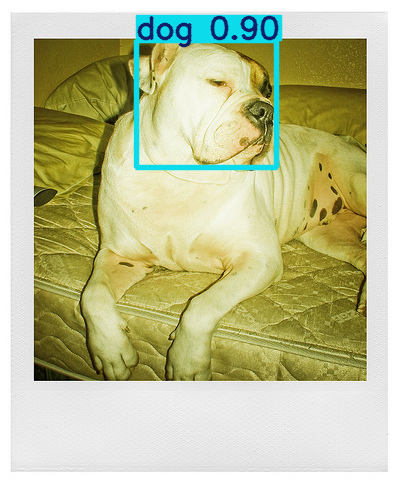

In [ ]:
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img)))